In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import regex as re

In [2]:
URL = requests.get('https://www.cbr.com/most-popular-anime-characters/',headers={
"User-Agent" : "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36"
})

In [3]:
soup = BeautifulSoup(URL.content,'html.parser')

In [4]:
character= soup.find_all('h2') #this tag contains both votes and names so use regular expressions to extract names and votes seprately

In [5]:
votes = []
popular_character = []
for i in character:
    vote=re.search("[0-9]+,[0-9]+",i.text)
    char = re.search(r"[a-zA-Z_ ]+",i.text)
    total_votes,fraction = vote.group().split(',')
    votes.append(int(total_votes+fraction))
    popular_character.append(char.group())

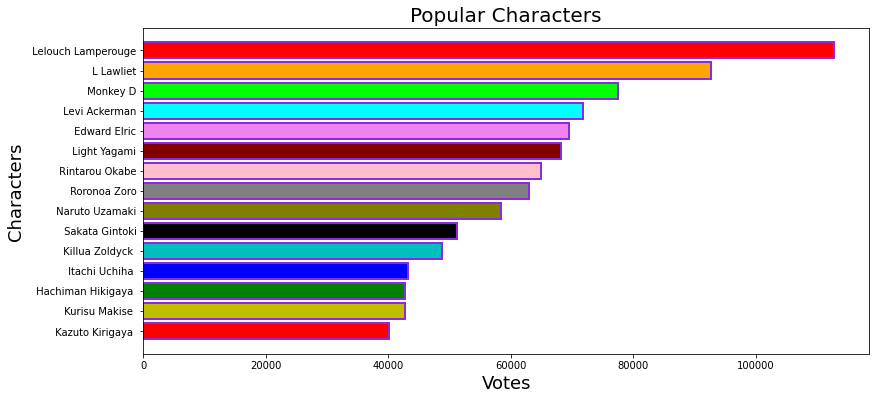

In [12]:
plt.figure(figsize=(13,6))
plt.barh(popular_character,votes, edgecolor='blueviolet',
        color=['r', 'y', 'g', 'b', 'c', 'k', 
               'olive', 'gray', 'pink', 'maroon','violet','aqua','lime','orange'], linewidth=2)
plt.xlabel("Votes",fontsize=18)
plt.ylabel("Characters",fontsize=18)
plt.title("Popular Characters",fontsize=20)

#add x-axis values to plot

plt.savefig('most_popular.png',bbox_inches="tight",pad_inches=0.3)